In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

from sklearn.datasets import load_boston
boston = load_boston()

boston.keys()
boston.data.shape
print (boston.feature_names)
#print (boston.DESCR)
bos = pd.DataFrame(boston.data)
#bos.head()
bos.columns = boston.feature_names
bos.head()
#boston.target[:5]
bos['PRICE'] = boston.target

#Scilear start
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1 )
lm = LinearRegression()
lm.fit(X, bos.PRICE)
print ("Estimated intercept coefficient", lm.intercept_)
print ("Number of coefficient", len(lm.coef_))

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Estimated intercept coefficient 36.4911032804
Number of coefficient 13


In [2]:
pd.DataFrame(list(zip(X.columns,lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


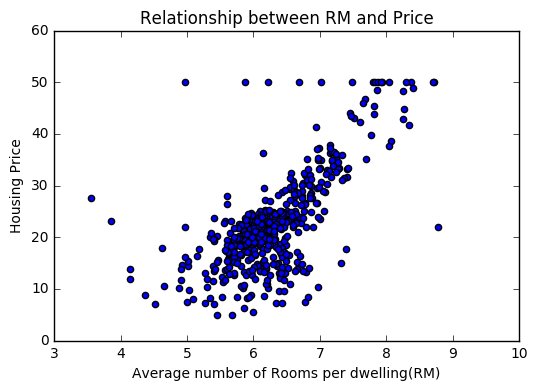

In [3]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of Rooms per dwelling(RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()

In [4]:
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

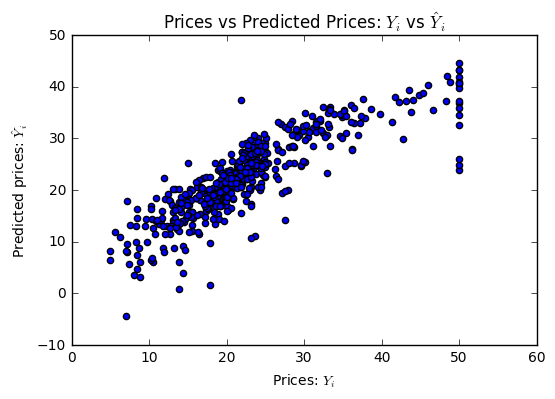

In [5]:
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [6]:
mseFull = np.mean((bos.PRICE - lm.predict(X)) ** 2)
print (mseFull)

21.8977792177


In [7]:
lm = LinearRegression()
lm.fit(X[['PTRATIO']],bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
print (msePTRATIO)

62.6522000138


In [13]:
#Training the validation set
X_train = X[:-50]
X_test = X[-50:]
Y_train = bos.PRICE[:-50]
Y_test = bos.PRICE[-50:]
print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(456, 13) (50, 13) (456,) (50,)


In [15]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, bos.PRICE, test_size = 0.33, random_state = 5)
print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(339, 13) (167, 13) (339,) (167,)


In [17]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)
print ("Fit a model X_train, and calculate MSE with Y_train", np.mean((Y_train - lm.predict(X_train)) ** 2))
print ("Fit a model X_train, and calculate MSE with X_test, Y_test", np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train 19.5467584735
Fit a model X_train, and calculate MSE with X_test, Y_test 28.5413672756


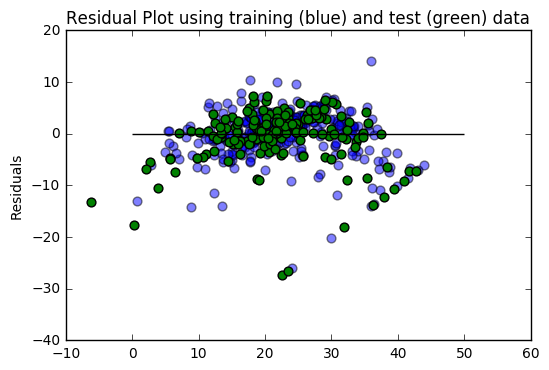

In [20]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.show()
